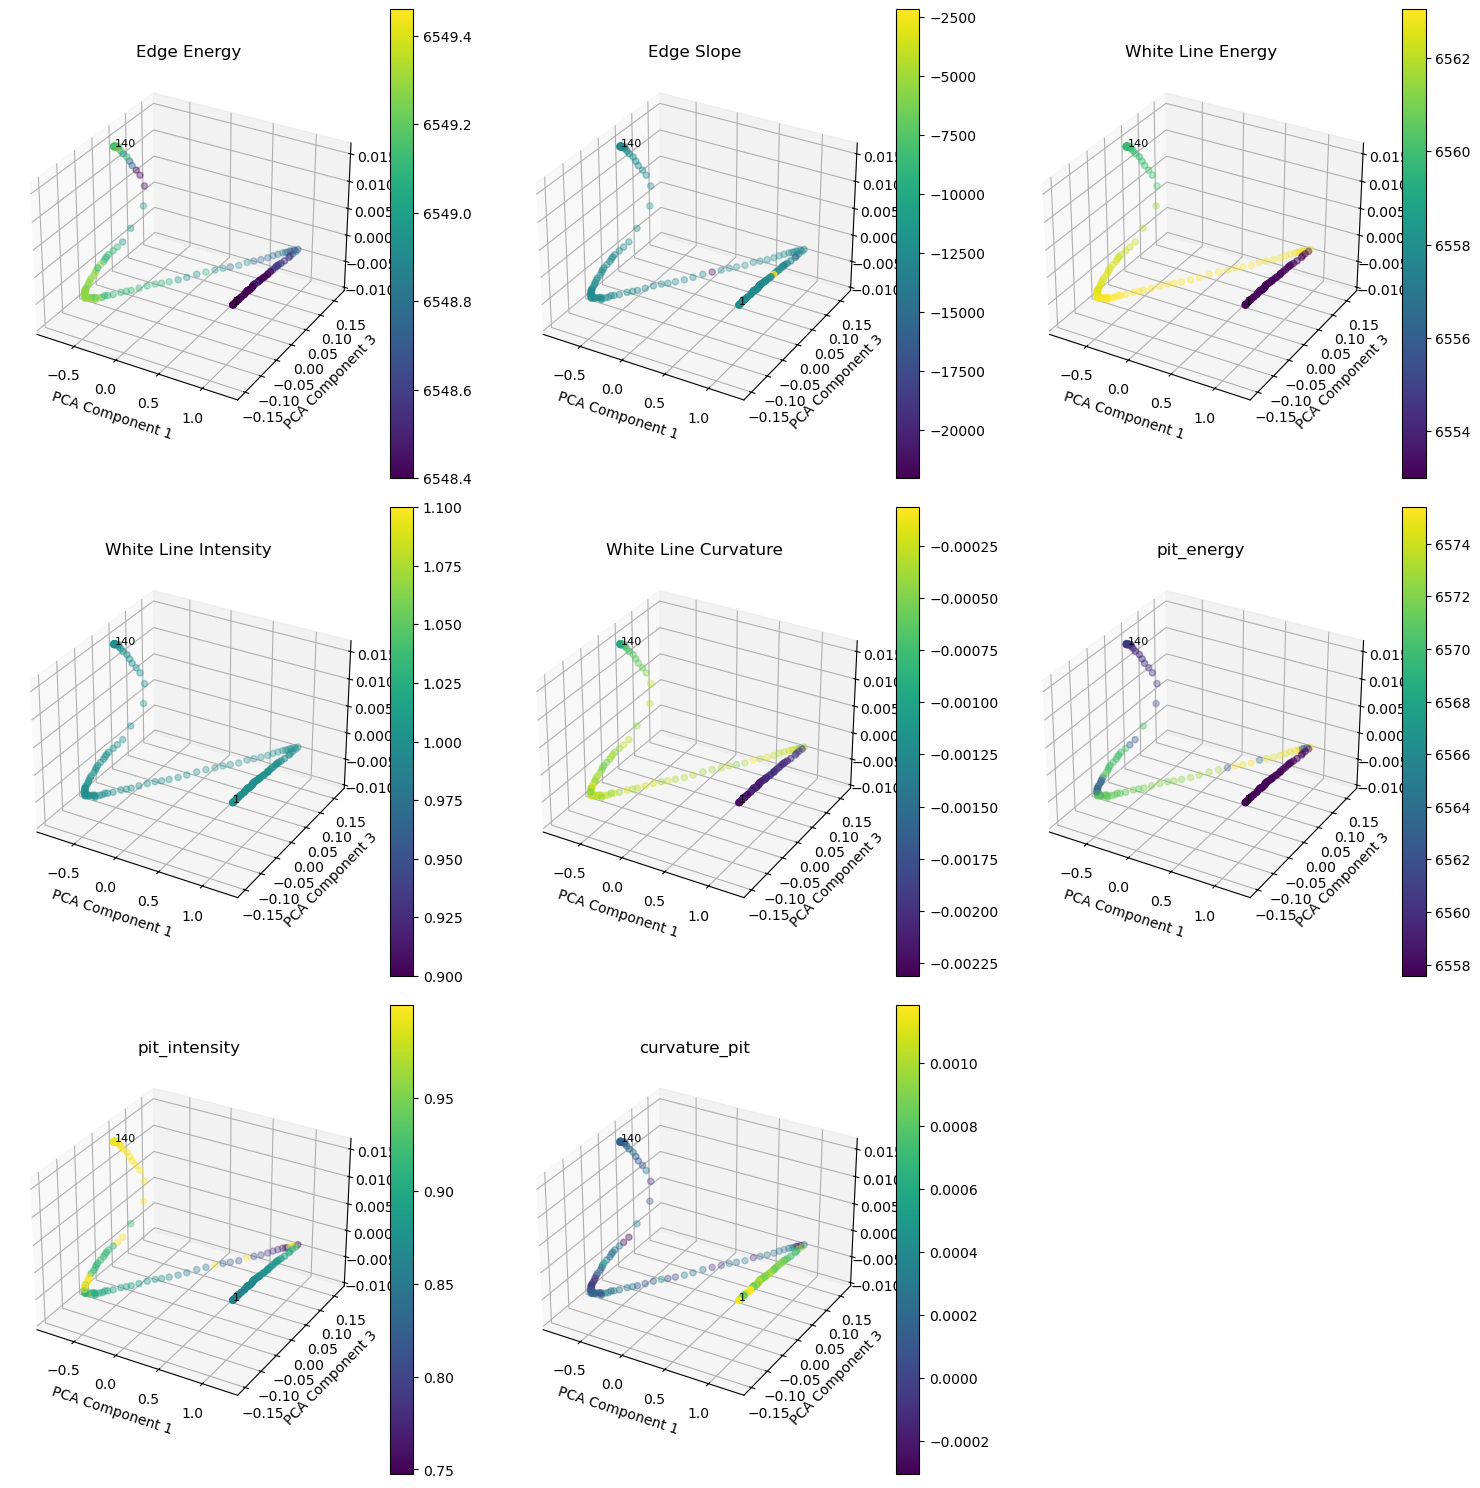

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

def visualize_xanes_features(features, embeddings):
    # Perform PCA on embeddings
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(embeddings)

    # Create a figure with 5 subplots (one for each feature)
    fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})
    axs = axs.ravel()  # Flatten the 2D array of axes

    # Define a colormap
    cmap = plt.get_cmap('viridis')

    feature_names = ['Edge Energy', 'Edge Slope', 'White Line Energy', 'White Line Intensity', 'White Line Curvature', 'pit_energy', 'pit_intensity', 'curvature_pit']

    for i in range(len(feature_names)):  # For each feature
        # Normalize the feature values
        norm = Normalize(vmin=features[:, i].min(), vmax=features[:, i].max())

        # Create a scatter plot
        scatter = axs[i].scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                                 c=features[:, i], cmap=cmap, norm=norm)
        
        # Annotate only the first and last points
        axs[i].text(pca_result[0, 0], pca_result[0, 1], pca_result[0, 2], '1', fontsize=8)
        axs[i].text(pca_result[-1, 0], pca_result[-1, 1], pca_result[-1, 2], str(pca_result.shape[0]), fontsize=8)


        # Add a colorbar
        plt.colorbar(scatter, ax=axs[i])

        # Set labels and title
        axs[i].set_xlabel('PCA Component 1')
        axs[i].set_ylabel('PCA Component 2')
        axs[i].set_ylabel('PCA Component 3')
        axs[i].set_title(f'{feature_names[i]}')

    # Remove the unused subplot
    fig.delaxes(axs[8])

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Load and preprocess the data
feature_file = 'xanes_features.csv'
embedding_file = 'embeddings'  
features = np.loadtxt(feature_file, delimiter=',', skiprows=1)
ym = np.loadtxt(embedding_file, delimiter=',')

# Call the visualization function
visualize_xanes_features(features, ym)